In [1]:
from sklearn.metrics import confusion_matrix, silhouette_score, calinski_harabasz_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Lambda
from sklearn.ensemble import IsolationForest
from keras.models import Sequential, Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import OneClassSVM
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import backend as K
from pandas import DataFrame
import seaborn as sb
import pandas as pd
import numpy as np
import sklearn
import random
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
pd.options.display.max_columns = None
data = pd.read_csv('Give Me Some Credit (Kaggle).csv')
data.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.shape

(150000, 12)

In [7]:
data.drop(columns='Unnamed: 0',inplace=True)
data.duplicated().sum()

609

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
# Checking for missing data
missing_values = data.isnull().sum()
print(missing_values)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64


In [13]:
value_counts = data['NumberOfDependents'].value_counts()
print("Count of each unique value:")
print(value_counts)

Count of each unique value:
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64


In [18]:
data = data.dropna()

In [37]:
data.head(5)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,2,16,11.135007,1,13,0,176346.62670,0,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,3609,11940,12191.99692,2,4,12.237563,2,17,2,39833.92100,1,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,28276,9311,21603.22455,2,11,12.545884,5,18,0,91506.69105,1,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,11170,6954,17877.15585,2,15,16.731201,2,12,0,108286.57590,1,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,16890,13226,13539.92667,2,32,15.008300,2,18,0,44234.82545,1,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0


In [19]:
# Splitting Data
X = data.drop(['SeriousDlqin2yrs'], axis = 1)
y = data['SeriousDlqin2yrs']

In [22]:
unique_values, counts = np.unique(y, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 111815
Value: 1, Count: 8355


In [21]:
X.shape

(120170, 10)

# FEATURE SELECTION using PCA

Text(0.5, 1.0, 'Cumulative Variance Explained by Principal Components')

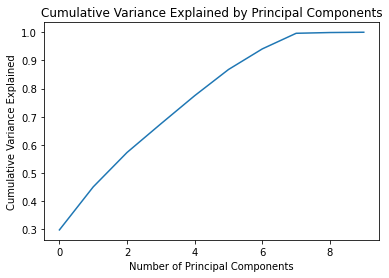

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(cumsum)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')

In [25]:
dim_85 = np.argmax(cumsum >= 0.85) + 1
print(f"Number of principal components needed to retain 85% of the variance is equal to : {dim_85}")

Number of principal components needed to retain 85% of the variance is equal to : 6


In [26]:
n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

In [27]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.030948,3.348359,1.599033,0.351252,-0.021988,-1.001741
1,0.016278,-1.467275,0.499696,-0.060846,-0.056150,0.034795
2,0.381545,-1.818529,-0.011367,-0.127866,-0.023598,0.199245
3,0.036555,-1.614507,0.321360,-0.069009,-0.046931,0.031668
4,0.003698,0.766772,0.158258,-1.795741,-0.060012,3.407483
...,...,...,...,...,...,...
120165,-0.055999,-0.997712,-0.616931,-0.077486,-0.017457,0.083968
120166,-0.135672,-0.406511,-1.553438,-0.066265,0.044664,0.135697
120167,-0.040615,-0.675620,1.102103,-0.058775,-0.072063,0.005020
120168,0.046611,-1.690948,0.359657,-0.157948,-0.047657,0.215817


# FEATURE SELECTION using Autoencoders

In [28]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

input_dim = X.shape[1] 
encoding_dim = 5  

autoencoder = Sequential()

# Encoder layers
autoencoder.add(Dense(9, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder layers
autoencoder.add(Dense(9, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error',  metrics=['accuracy'])

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)

# Extract features using the encoder part of the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
X_encoded = encoder.predict(X_scaled)


# Create a DataFrame with the encoded features
columns = [f'AEC{i+1}' for i in range(encoding_dim)]
df_AEC = pd.DataFrame(data=X_encoded, columns=columns)


Epoch 1/50
3756/3756 [==============================] - 2s 476us/step - loss: 0.8430 - accuracy: 0.6619
Epoch 2/50
3756/3756 [==============================] - 2s 479us/step - loss: 0.7978 - accuracy: 0.7931
Epoch 3/50
3756/3756 [==============================] - 2s 477us/step - loss: 0.7952 - accuracy: 0.7971
Epoch 4/50
3756/3756 [==============================] - 2s 481us/step - loss: 0.7927 - accuracy: 0.8158
Epoch 5/50
3756/3756 [==============================] - 2s 480us/step - loss: 0.7922 - accuracy: 0.8190
Epoch 6/50
3756/3756 [==============================] - 2s 488us/step - loss: 0.7918 - accuracy: 0.8212
Epoch 7/50
3756/3756 [==============================] - 2s 489us/step - loss: 0.7915 - accuracy: 0.8233
Epoch 8/50
3756/3756 [==============================] - 2s 489us/step - loss: 0.7913 - accuracy: 0.8229
Epoch 9/50
3756/3756 [==============================] - 2s 484us/step - loss: 0.7910 - accuracy: 0.8207
Epoch 10/50
3756/3756 [==============================] - 2s 484u

In [32]:
df_AEC

,AEC1,AEC2,AEC3,AEC4,AEC5
0,9.138163,5.683717,13.547121,1.397843,6.744338
1,5.854213,4.187548,2.416548,2.445493,2.687917
2,5.814229,3.825303,1.567342,2.052745,3.070829
3,5.821022,3.940875,2.451198,2.956245,3.286942
4,0.655858,0.090615,2.036345,1.581084,2.447421
...,...,...,...,...,...
120165,5.847477,3.417836,2.535191,4.070722,4.589034
120166,6.464173,6.255451,2.836013,5.802892,11.060682
120167,5.640742,10.383868,5.927161,2.969138,4.399160
120168,5.435028,3.763283,2.008279,2.532069,3.036900


# FEATURE SELECTION using Contrastive Learning

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

class SiameseNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 8),
            nn.ReLU(),
            nn.Linear(8, 6),
            nn.ReLU(),
            nn.Linear(6, output_size)
        )

    def forward(self, x1, x2):
        out1 = self.fc(x1)
        out2 = self.fc(x2)
        return out1, out2

class ContrastiveLoss(nn.Module):
    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

siamese_network = SiameseNetwork(input_size=10, output_size=5)
contrastive_loss = ContrastiveLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=0.001)

class SiameseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        x1 = self.X[index]
        label = self.y[index]
        x2 = self.X[torch.randint(len(self.X), (1,)).item()]
        return x1, x2, torch.tensor(label, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

batch_size = 64
train_dataset = SiameseDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

num_epochs = 2
for epoch in range(num_epochs):
    for x1, x2, label in train_loader:
        optimizer.zero_grad()
        output1, output2 = siamese_network(x1, x2)
        loss = contrastive_loss(output1, output2, label)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

siamese_network.eval()
with torch.no_grad():
    num_samples = len(X_tensor)
    indices = torch.randint(num_samples, (num_samples,))
    x1_eval = X_tensor
    x2_eval = X_tensor[indices]

    all_outputs, _ = siamese_network(x1_eval, x2_eval)

    

columns = [f'CL{i+1}' for i in range(5)]
df_CL = pd.DataFrame(data=all_outputs, columns=columns)

Epoch [1/2], Loss: 0.093782439827919
Epoch [2/2], Loss: 0.05910569801926613


# Treating the minority class as an anomaly and using anomaly detection techniques for classification

In [36]:
# For CL

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(df_CL)

y_pred = clf.predict(df_CL)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")


Confusion Matrix:
[[101654  10161]
 [  3897   4458]]
Calinski-Harabasz Index: 111821.88831595337
Homogeneity: 0.15367904602331456
Completeness: 0.10478116406510242
V-Measure: 0.12460462931008813


In [37]:
# For PCA

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(df_pca)

y_pred = clf.predict(df_pca)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[105705   6110]
 [  7142   1213]]
Calinski-Harabasz Index: 4246.128070637109
Homogeneity: 0.013904782675648267
Completeness: 0.015290151223634595
V-Measure: 0.014564597445288882


In [38]:
# For Auto-encoder

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(df_AEC)

y_pred = clf.predict(df_AEC)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[98667 13148]
 [ 7160  1195]]
Calinski-Harabasz Index: 21033.20565264066
Homogeneity: 0.0007511898474843218
Completeness: 0.0005185696343683589
V-Measure: 0.0006135717041195737


In [39]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(X_scaled)

y_pred = clf.predict(X_scaled)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[106296   5519]
 [  5639   2716]]
Calinski-Harabasz Index: 2573.6812309398833
Homogeneity: 0.09118963549145254
Completeness: 0.09213800325462128
V-Measure: 0.0916613663838958


# Using K-means

In [40]:
# For CL
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(df_CL)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[107893   3922]
 [  5277   3078]]
Calinski-Harabasz Index: 180248.88042503086
Homogeneity: 0.13854973428469106
Completeness: 0.15743986705696406
V-Measure: 0.14739201409566305


In [41]:
# For PCA
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(df_pca)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111753     62]
 [  8272     83]]
Calinski-Harabasz Index: 61362.923807002495
Homogeneity: 0.004190659592839383
Completeness: 0.11356430341516709
V-Measure: 0.008083045085386913


In [42]:
# For Auto-encoder
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(df_AEC)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111750     65]
 [  8272     83]]
Calinski-Harabasz Index: 57376.39055015018
Homogeneity: 0.00411503243106848
Completeness: 0.10954520632291481
V-Measure: 0.007932098007687571


In [43]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111753     62]
 [  8272     83]]
Calinski-Harabasz Index: 49871.221926155325
Homogeneity: 0.004190659592839383
Completeness: 0.11356430341516709
V-Measure: 0.008083045085386913


# For GMM

In [44]:
# For CL
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(df_CL)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[13193 98622]
 [ 4950  3405]]
Calinski-Harabasz Index: 97834.16042158552
Homogeneity: 0.15742500470739498
Completeness: 0.09362840966818338
V-Measure: 0.11742085141060306


In [45]:
# For PCA
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(df_pca)

# Evaluate t he model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111753     62]
 [  8272     83]]
Calinski-Harabasz Index: 61362.923807002495
Homogeneity: 0.004190659592839383
Completeness: 0.11356430341516709
V-Measure: 0.008083045085386913


In [46]:
# For Auto-encoder
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(df_AEC)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[108179   3636]
 [  7593    762]]
Calinski-Harabasz Index: 7681.185435470979
Homogeneity: 0.009235304824015285
Completeness: 0.014849894828418829
V-Measure: 0.011388180901473737


In [47]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(X_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[108193   3622]
 [  8005    350]]
Calinski-Harabasz Index: 1874.9188176371258
Homogeneity: 0.0003362727234091087
Completeness: 0.0005845683917955277
V-Measure: 0.00042694532614191694


# For OneClassSVM

In [48]:
# For CL
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(df_CL)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111450    365]
 [  8120    235]]
Calinski-Harabasz Index: 4335.387858223171
Homogeneity: 0.008359486317594766
Completeness: 0.06710971993952466
V-Measure: 0.0148670646859798


In [49]:
# For PCA
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(df_pca)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111305    510]
 [  8262     93]]
Calinski-Harabasz Index: 3673.875443754578
Homogeneity: 0.0008435848860563418
Completeness: 0.006743937468032522
V-Measure: 0.001499589313888611


In [50]:
# For Auto-encoder
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(df_AEC)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111348    467]
 [  8220    135]]
Calinski-Harabasz Index: 4089.680372321929
Homogeneity: 0.0024305634065166226
Completeness: 0.019457977204808758
V-Measure: 0.004321333998336316


In [51]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(X_scaled)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[111314    501]
 [  8255    100]]
Calinski-Harabasz Index: 2826.95565196586
Homogeneity: 0.0010684377203589578
Completeness: 0.00856538673022197
V-Measure: 0.0018998856204981774


In [52]:
# GMM, Kmeans, IsolationForest, OneClassSVM

In [ ]:
# reduce false positives.